## ЗАДАНИЕ №2


In [555]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import math
from sklearn.utils import resample

### Генерируем выборку и формируем вариационный ряд

In [556]:
n = 25  # мощность выборки
viborka = st.expon.rvs(loc=0, scale=1, size=n)  # наша выборка
var_series = np.sort(viborka)  # вариационный ряд

### Пункт "a)"
#### Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии

In [557]:
# считаем моду
elements, counts = np.unique(viborka, return_counts=True)
if len(elements) == n:
    moda = viborka
else:
    moda = elements[np.argmax(counts)]

print('Мода : ', moda)

# находим медиану
mediana = var_series[12]
print('Медиана : ', mediana)

# находим размах
razmah = np.max(viborka) - np.min(viborka)
print('Разамах : ', razmah)

# оцениваем коэффициент асимметрии
viborka_minus_aver = viborka - 1/n * np.sum(viborka)
m_2 = 1/n * np.sum(viborka_minus_aver * viborka_minus_aver)
m_3 = 1/n * np.sum(viborka_minus_aver *
                   viborka_minus_aver * viborka_minus_aver)
gamma = (m_3 / m_2 ** (3 / 2))
print('Коэффициент ассиметрии : ', gamma)

Мода :  [0.60098034 1.26735945 0.845436   2.10459348 0.59483416 0.00605469
 4.21542451 0.19930328 0.73421252 1.43127525 1.64130566 0.49229483
 2.52983636 0.37450939 0.2686014  0.14611306 0.29438904 3.5193385
 0.25883154 1.68142438 1.14687585 0.77833033 0.43414249 0.34618145
 0.24404839]
Медиана :  0.6009803433116065
Разамах :  4.209369821495299
Коэффициент ассиметрии :  1.5858902194719595


### Пункт "b)"
#### Построить эмпирическую функцию распределения, гистограмму и boxplot

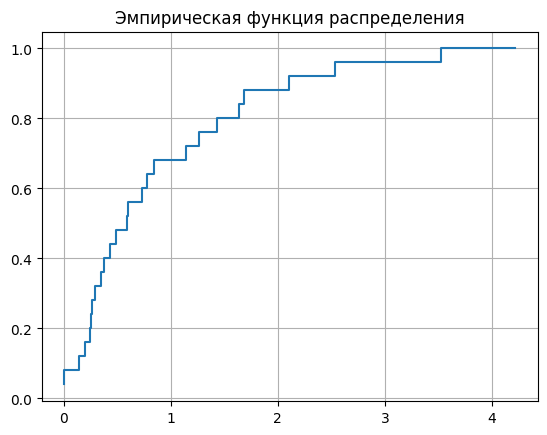

In [558]:
# строим эмпирическую функцию
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y


x, y = ecdf(var_series)

plt.step(x, y)
plt.title('Эмпирическая функция распределения')
plt.grid(True)
plt.show()

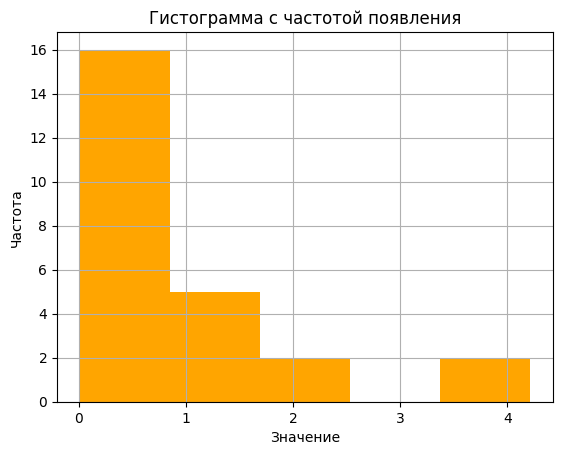

In [559]:
# строим гистограму
k = int(1 + np.log2(n))

plt.hist(viborka, bins=k, orientation='vertical', color='orange')
plt.xlabel('Значение')
plt.title('Гистограмма с частотой появления')
plt.grid(True)
plt.ylabel('Частота')
plt.show()

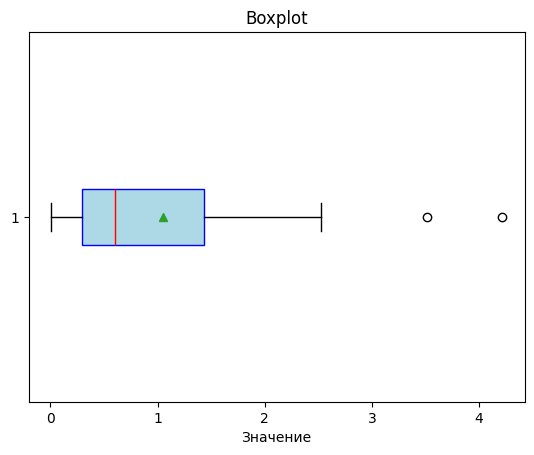

In [560]:
# строим boxplot
plt.boxplot(viborka,
            vert=False,  # Горизонтальный boxplot
            showmeans=True,  # Отображение среднего
            showfliers=True,  # Не показывать выбросы
            patch_artist=True,  # Для заполнения цветом коробки
            boxprops=dict(facecolor="lightblue", color="blue"),  # Цвет коробки
            medianprops=dict(color="red"))  # Цвет медианы
plt.xlabel('Значение')
plt.title('Boxplot')
plt.show()

## Пункт "с)"
### Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности

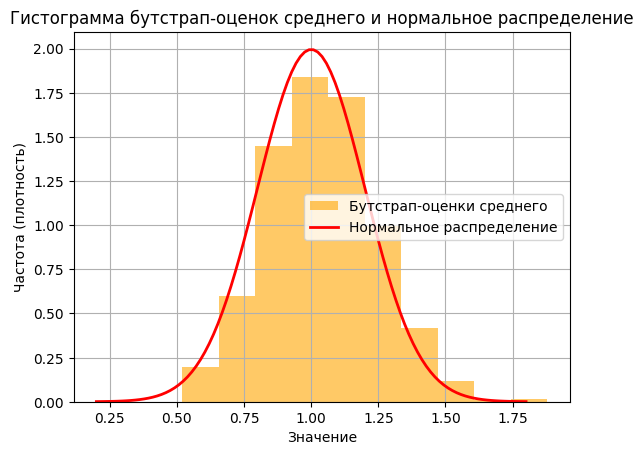

In [ ]:
# заводим массив средних значений
aver_list = []

# генерируем бутстрап-выборки
for _ in range(1000):
    indices = np.random.choice(n, size=n, replace=True)
    bootstrap_sample = viborka[indices]
    aver_list.append(np.average(bootstrap_sample))

k_aver = int(1 + np.log2(1000))

# указываем параметры номального распределения, посчитанные из ЦПТ и строим распределение
mu = 1
sigma = 1/5
norm_dist = st.norm(loc=mu, scale=sigma)

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

pdf = norm_dist.pdf(x)

plt.hist(aver_list, bins=k_aver, density=True, alpha=0.6, color='orange',
         label='Бутстрап-оценки среднего')
plt.plot(x, pdf, 'r', linewidth=2, label='Нормальное распределение')

plt.xlabel('Значение')
plt.title('Гистограмма бутстрап-оценок среднего и нормальное распределение')
plt.grid(True)
plt.ylabel('Частота (плотность)')
plt.legend()
plt.show()

## Пункт "d)"
### Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1

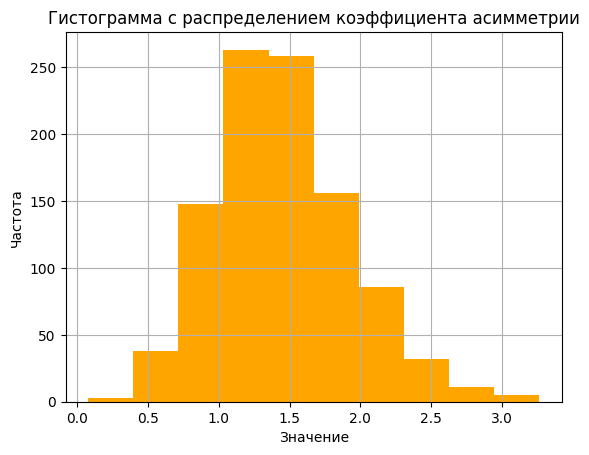

Вероятность того, что коэффициент асимметрии будет меньше 1 :  0.173


In [562]:
koeff_list = []

# генерируем бутстрап-выборки
for _ in range(1000):
    indices = np.random.choice(n, size=n, replace=True)
    bootstrap_viborka = viborka[indices]
    viborka_minus_aver = bootstrap_viborka - 1/n * np.sum(bootstrap_viborka)
    m_2 = 1/n * np.sum(viborka_minus_aver * viborka_minus_aver)
    m_3 = 1/n * np.sum(viborka_minus_aver *
                       viborka_minus_aver * viborka_minus_aver)
    gamma = (m_3 / m_2 ** (3 / 2))
    koeff_list.append(gamma)

k_koeff = int(1 + np.log2(1000))

plt.hist(koeff_list, bins=k_koeff, orientation='vertical', color='orange')
plt.xlabel('Значение')
plt.title('Гистограмма с распределением коэффициента асимметрии')
plt.grid(True)
plt.ylabel('Частота')
plt.show()

# оцениваем вероятность того, что коэффициент асимметрии будет меньше 1
koeff_list = np.array(koeff_list)
less_than_one = np.count_nonzero(koeff_list < 1)
p_less_than_one = less_than_one/1000
print('Вероятность того, что коэффициент асимметрии будет меньше 1 : ', p_less_than_one)

## Пункт "e)"
### Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

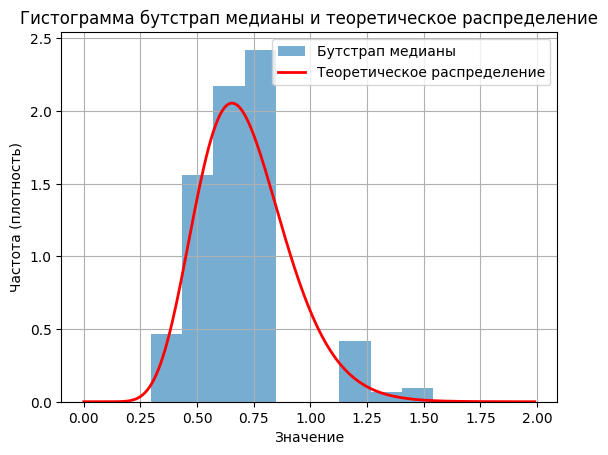

In [563]:
# бутстрапим
med_list = []

# генерируем бутстрап-выборки
for _ in range(1000):
    indices = np.random.choice(n, size=n, replace=True)
    bootstrap_viborka = viborka[indices]
    bootstrap_mediana = np.sort(bootstrap_viborka)[12]
    med_list.append(bootstrap_mediana)

k_med = int(1 + np.log2(1000))


# строим распределение медианы
k = 13
x = []
y = []

for t in np.arange(0, 2, 0.01):
    x.append(t)
    yi = (np.e**(-t) * n * (math.factorial(n - 1) /
          (math.factorial(n - k) * math.factorial(k - 1))) * (np.e**(-t))**(n - k) * (1 - np.e**(-t)) ** (k - 1))
    y.append(yi)


fig, ax = plt.subplots()
ax.hist(med_list, bins=k_med, density=True, orientation='vertical',
        label='Бутстрап медианы', alpha=0.6)
ax.plot(x, y, 'r-', linewidth=2, label='Теоретическое распределение')

ax.set_xlabel('Значение')
ax.set_ylabel('Частота (плотность)')
ax.set_title('Гистограмма бутстрап медианы и теоретическое распределение')
ax.grid(True)
ax.legend()

plt.show()